In [1]:
import lightkurve as lk

lcf = lk.search_lightcurvefile('K2-168').download()

In [2]:
lcf.hdu[0].header['KEPMAG']

12.105

In [3]:
lcf.ra, lcf.dec

(333.10989, -16.341755)

In [4]:
import threemultis

/Users/ch/miniconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [6]:
import pickle
samples = pickle.load(open('../../threemultis/results/K2-168_samples.p', 'rb'))

lc= pickle.load(open('../../threemultis/results/K2-168.p', 'rb'))

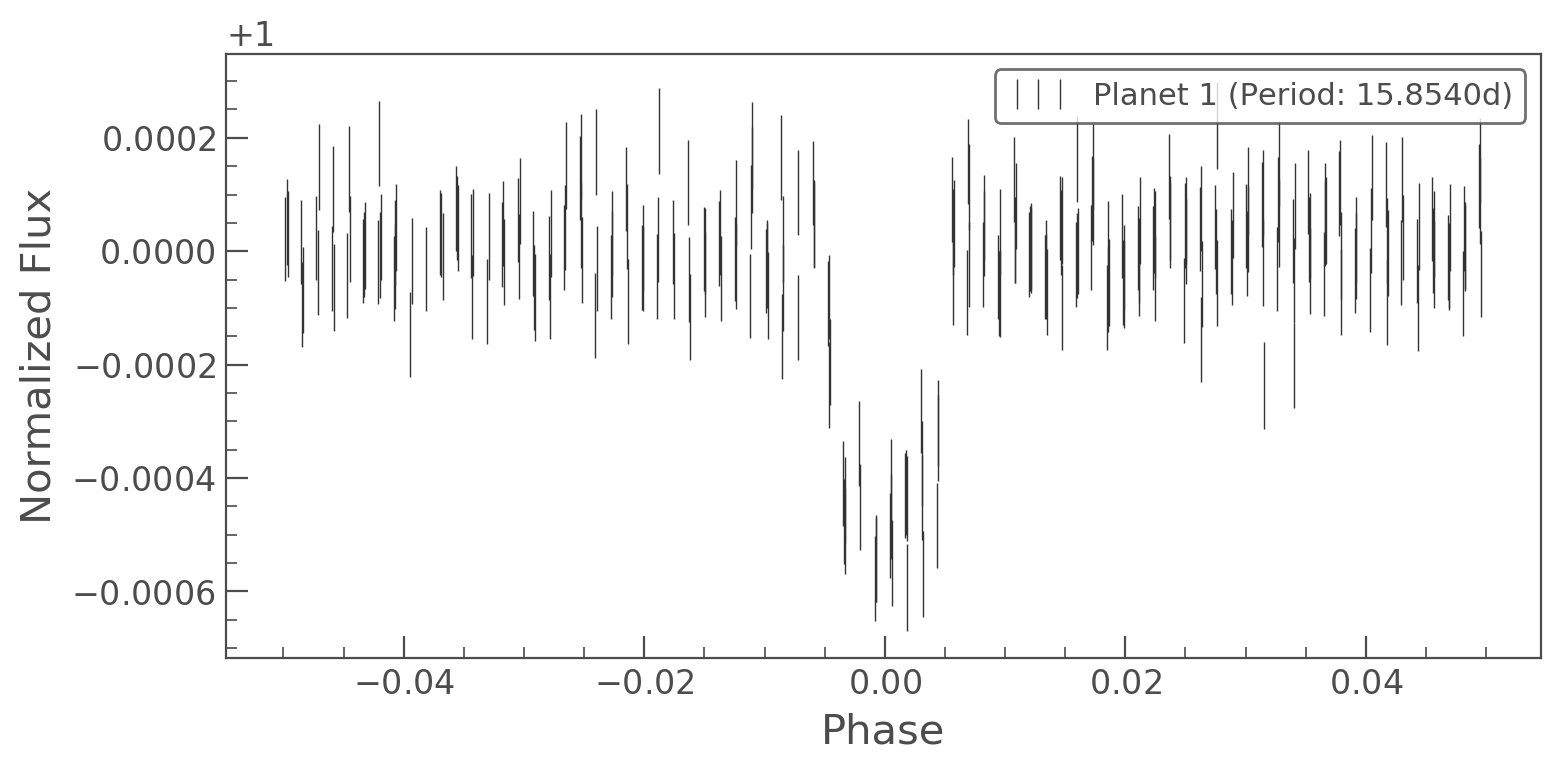

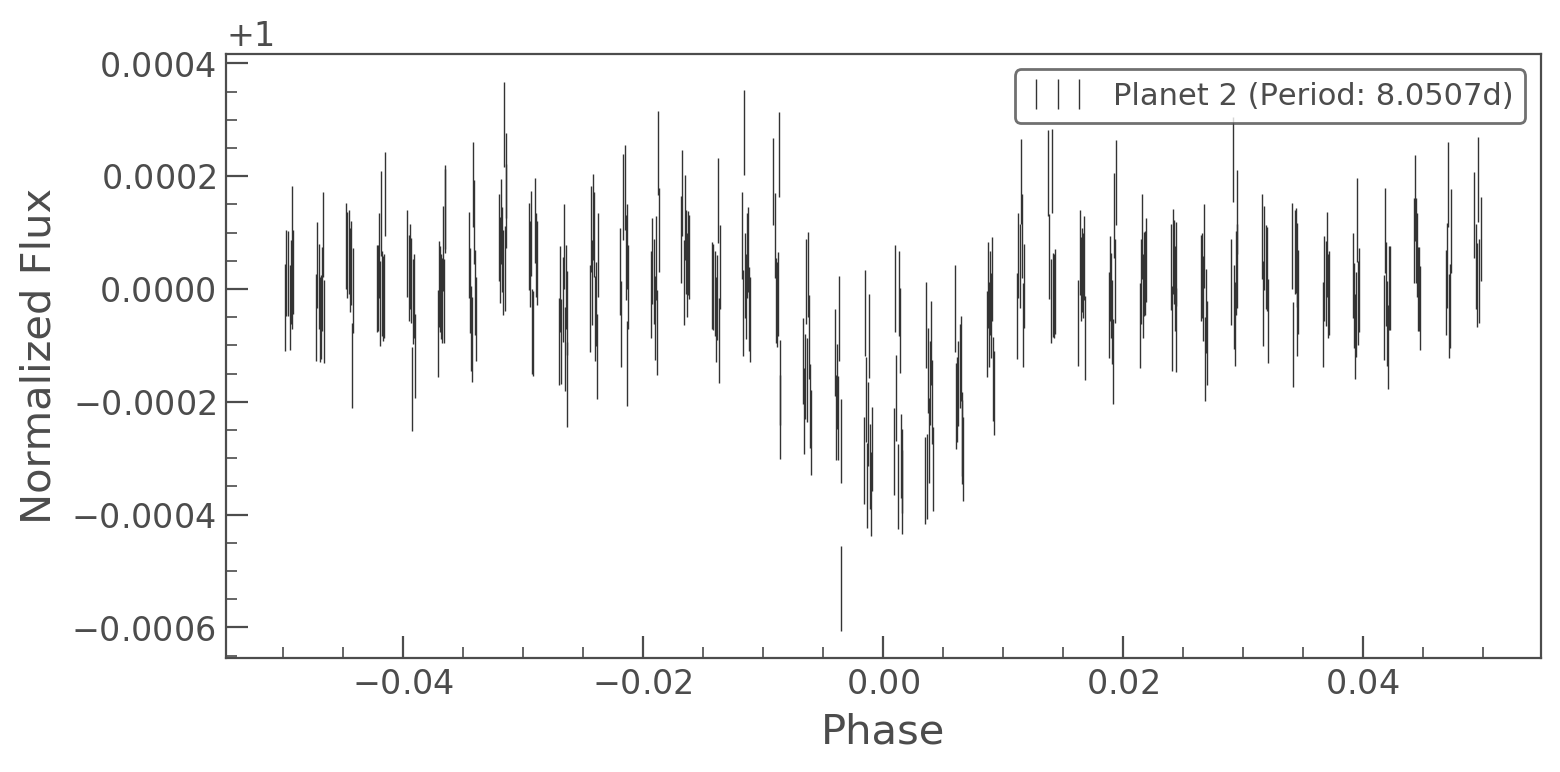

In [17]:
import pandas as pd
import numpy as np
params = threemultis.utils.get_params('K2-168')
letters= ['b', 'c', 'd']
for planet, df in params.iterrows():
    otherplanets = list(set(list(np.arange(len(params)))) - set([planet]))
    mask = np.ones(len(lc.time), bool)
    for op in otherplanets:
        p1 = params.loc[op, 'Period']
        t01 = params.loc[op, 'T0']
        d1 = params.loc[op, 'Duration']
        x_fold = (lc.time - t01 + 0.5*p1) % p1 - 0.5*p1
        mask &= (np.abs(x_fold) > d1/2)

    p = df['Period']
    t0 = df['T0']
    d = df['Duration']
    x_fold = (lc.time - t0 + 0.5*p) % p - 0.5*p
    f = lc[mask].fold(p, t0).bin(1)
    k = np.abs(f.phase) < 0.05
    f = f[k]

    f.errorbar(label='Planet {} (Period: {:2.4f}d)'.format(planet + 1, p))
    
    r = pd.DataFrame(columns=['phase', 'flux', 'flux_err'])
    r['phase'] = f.phase * p
    r['flux'] = f.flux
    r['flux_err'] = f.flux_err
    r.to_csv('{0}/K2-168{0}.csv'.format(letters[planet]), index=None, header=None)

In [12]:
np.exp(samples.logP__1.median())

8.050759832905571

In [13]:
samples.r_pl__1.median()

0.012583269491395935

In [18]:
lc

KeplerLightCurve(ID: 205950854)